## Visualize the trend of Enrollments in U.S over the 1990 to 2016 in different education level

Import libraries and define generic functions

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graph(x, y, style, xlabel, ylabel, title, label='', legend=None, pointlabel=False):
    plt.plot(x, y, style, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
      plt.legend()
    
    if pointlabel:
        for a,b in zip(x[::5], y[::5]):
            plt.text(a+0.2, b-0.5, str(b))
        


## 1. THE ENROLLMENT TREND IN EDUCATION
**Data**
1. Enrollment in elementary, secondary, and degree-granting postsecondary institutions by NCES 1869-70 through fall 2028 [link](https://nces.ed.gov/programs/digest/d18/tables/dt18_105.30.asp)

**Visualization Takeaway**

1. The enrollment growth in post secondary education is highest compare to other enrollments over the time
2. The enrollments in post secondary institutions growing rapdily starting from 2000 year.
3. The enrollments in post secondary institutions increased by almost 10% between 2000 and 2016.

From the enrollment data of students by NCES represented below, we can see the growth of enrollments over the time. The visualization implies that the enrollment growth in post secondary education is highest compare to other enrollments over the time. 

There has been large addition to the number of enrollment in post secondary schools starting from 2000 year. The enrollments increased by almost 5% between 2005 to 2008 and 10% between 2000 to 2016. The decrease in 2009 year might be reason of economy crisis. However, we still need to research if there is relation between the fall of enrollments in 2009 and economy crisis. 



In [93]:
### Load data from CSV downloaded from  
data = pd.read_csv('data/NCES_Enrollment_Data.csv', dtype={'Year':np.str, 'Total Enrollment':np.int32,
       'Elementary & Secondary enrollment':np.int32,
       'Public elementary and secondary':np.int32,
       'Private elementary and secondary schools':np.int32,
       'Degree-granting postsecondary institutions Total':np.int32,
       'Public post graduation colleges':np.int32, 'Private post graduation colleges':np.int32}, thousands=',')


#### Clean data

Clean 'Year' column as following for example

    1869-70 => 1869
    Fall 1959 => 1959

    And conver year column in integer


In [94]:
data['Year'] = data['Year'].replace(regex=r'(Fall )()', value='')
data['Year'] = data['Year'].replace(regex=r'()(-)(\d{2})*', value='')
data['Year'] = pd.to_numeric(data['Year'])


### 1.1 Show total enrollment data from 1990-2016

We are normalizing the values by dividing all values by its average over the years to compare the trends over different types of education.

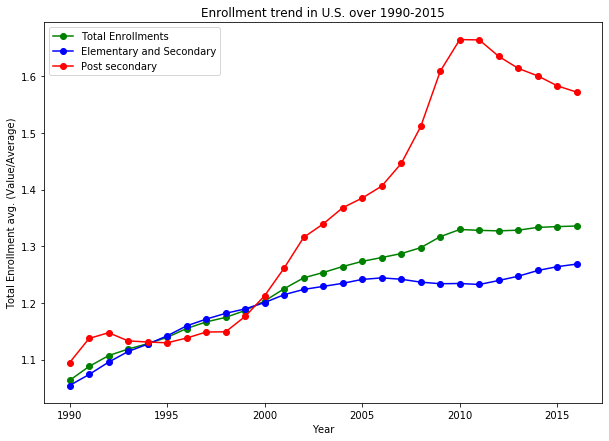

In [95]:
x = data['Year'][12:].values
y = data['Total Enrollment'][12:].div(data['Total Enrollment'].mean()).values
y1 = data['Elementary & Secondary enrollment'][12:].div(data['Elementary & Secondary enrollment'].mean()).values
y2 = data['Degree-granting postsecondary institutions Total'][12:].div(data['Degree-granting postsecondary institutions Total'].mean()).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.",label="Total Enrollments")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y1, '-ob', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.", label="Elementary and Secondary")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y2, '-or', "Year", "Total Enrollment avg. (Value/Average)", "Enrollment trend in U.S. over 1990-2015", label="Post secondary", legend=True)
plt.show()


### 1.2 Comapre enrollment growth over the years between post secondary and secodary graduation


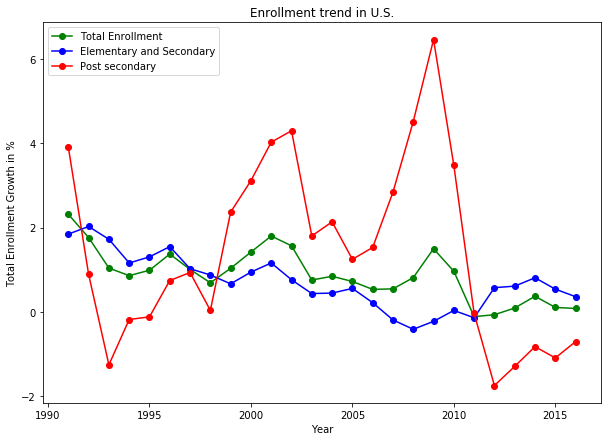

In [97]:
x = data['Year'][13:].values
y = data['Total Enrollment'].pct_change()[13:].mul(100).values
y1 = data['Elementary & Secondary enrollment'].pct_change()[13:].mul(100).values
y2 = data['Degree-granting postsecondary institutions Total'].pct_change()[13:].mul(100).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.", label='Total Enrollment')
plot_graph(x, y1, '-ob', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Elementary and Secondary")
plot_graph(x, y2, '-or', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Post secondary", legend=True)

plt.show()


## 2. INCREAMENT OF GRADUATE COURSES'S TUTION FEES

**Data**
1. Inflation rate in United States by US INFLATION CALCULATOR [link](https://www.usinflationcalculator.com/inflation/historical-inflation-rates/)
2. Average graduate tuition and required fees in degree-granting postsecondary institutions, by control of institution and percentile of charges: 1989-90 through 2016-17 [link](https://nces.ed.gov/programs/digest/d17/tables/dt17_330.50.asp)

**Visualization Takeaway**

1. The growth rate of graduation program tution fees is higher than the growth rate of inflation in U.S.
2. The graduate program tution fees increase in Public Institutions is high comparitively to the Private Institutions
3. Although the percentage of tution fee increament in Public Institutions in leading than Private Institutions over a time, the fees of Private Institutions is high than Public Institutions(almost 100% high in 2016 and 300% high in 2000)

As shown in graph below, the growth rate of graduate program fees over a time is even higher than growth rate percentage of overall inflation in U.S
The tution fee were incrased by highest percent in 2002 by Public Universities and in consequent year 2003 by Private  Universities. As we saw in previous visualization that the number of enrollment increased drastically from 2000 might be reason of increase in tution fees of courses. Although, the first significant decreament in 2002 followed by increament in 2003 in tution fees in Private Universities is still subject to research. The fact that, the fees in Private Universities are comparitively very high than Public Universities could be the reason behind less percentage of increament in tution fees in Private Universities than Public Universities. 


In [99]:
data = pd.read_csv('data/NCES_graduate_fees.csv').apply(pd.to_numeric)
inflation = pd.read_csv('data/inflation_rate.csv')
data


,Year,Total,Public Institutions,Private Institutions,PI Profit,PI Non-profit,PB 25Percentile,PB Median,PB 75Percentile,NP 25Percentile,NP Median,NP 75Percentile
0,1999,8069,4042,13821,14123,9611,2640,3637,5163,7998,12870,20487
1,2000,8429,4243,14420,14457,13229,2931,3822,5347,8276,13200,21369
2,2001,8857,4496,15165,15232,13414,3226,4119,5596,8583,14157,22054
3,2002,9226,4842,14983,15676,9644,3395,4452,5927,8690,14140,22700
4,2003,10312,5544,16209,16807,12542,3795,5103,7063,9072,15030,25600
5,2004,11004,6080,16751,17551,13133,4236,5663,7616,9300,16060,26140
6,2005,11621,6493,17244,18171,13432,4608,6209,7977,9745,16222,26958
7,2006,12312,6894,18108,19033,14421,4909,6594,8341,10346,17057,29118
8,2007,13002,7415,18878,19896,14713,5176,6990,9288,10705,17647,30247
9,2008,13647,7999,19230,20485,14418,5612,7376,9912,11290,18270,30514


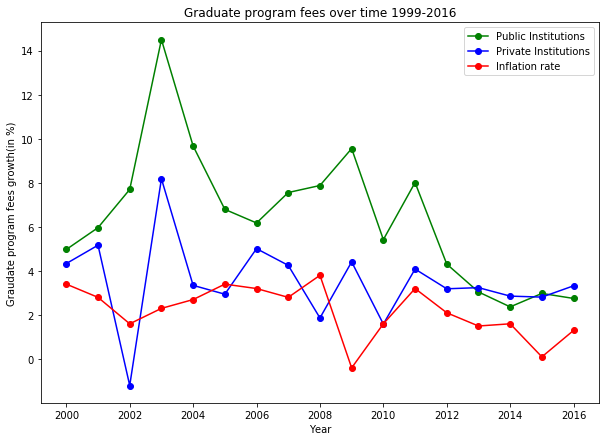

In [105]:
x = data['Year'][1:].values
y = data['Public Institutions'].pct_change().mul(100)[1:].values
y1 = data['Private Institutions'].pct_change().mul(100)[1:].values
y2 = inflation['Inflation'][1:].values  # Already percentage value

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Public Institutions')
plot_graph(x, y1, '-ob', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Private Institutions')
plot_graph(x, y2, '-or', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Inflation rate')
plt.legend()


## 3. INCREAMENT OF EDUCATION LOANS

**Data**

1. Percentage of graduate degree completers with student loan debt and average cumulative amount owed, by level of education funded and graduate degree type, institution control, and degree program: Selected years, 1999-2000 through 2015-16 by NCES [link](https://nces.ed.gov/programs/digest/d17/tables/dt17_332.45.asp)

2. Just Released: Press Briefing on Student Loan Borrowing and Repayment Trends, 2015 by New York Fed [link](https://libertystreeteconomics.newyorkfed.org/2015/04/just-released-press-briefing-on-student-loan-borrowing-and-repayment-trends-2015.html)

**Visualization Takeaway**

1. Between the period of 2000-2016 almost 50% of total students pursuing higher education in any major or university had student/education loan at the time of their graduation
2. The largest increament in loans happened between 2000-2004 which is also the perod when Public and Private Institutaions increased the tution fees with the highest percent of amount. 
3. ~50% of the total student loans from 200-2014 is taken by student between age under 30
4. ~30% of students have 10-25k student loan amount in 2014.

As shown in graph below, between the period of 2000-2016 almost 50% of total students pursuing higher education in any major or university had student/education loan at the time of their graduation. And the trend of education loans for higher education in students in increasing over a time with a 1-4% a year. 

This shows that as the number of students enrolling in graduate courses increased each year, around 50% of those students take loans to sponsor their higher study each year. Therefore, the number of students taking loans each year for higher programs is increasing. 

The second graph shows us that the amount of loan taken by students to fund their higher studies is increasing over a time, which is obvious now considering we have the insight into the growth of tution fees for graduate courses. As the expenses of higher studies increases, the amount of loans taken by students also increases over a time. 

NOTE:
Both first charts represent the data at the end of their graduation course completion. Which means that it covers the student with grants, side income during the course etc. during the course if the student had any. 

In [140]:
data = pd.read_csv('data/NCES_student_loan.csv').apply(pd.to_numeric)
data

,Year,Percent of graduate degree completers with student loan debt,Average cumulative amount owed
0,2000,51.3,37900
1,2004,60.9,45600
2,2008,62.9,51700
3,2012,64.1,73100
4,2016,60.5,82800


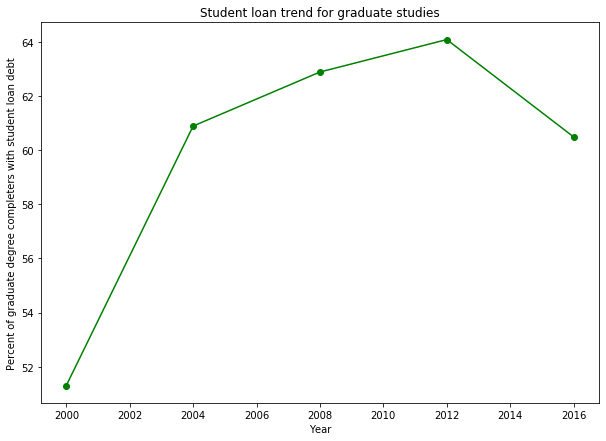

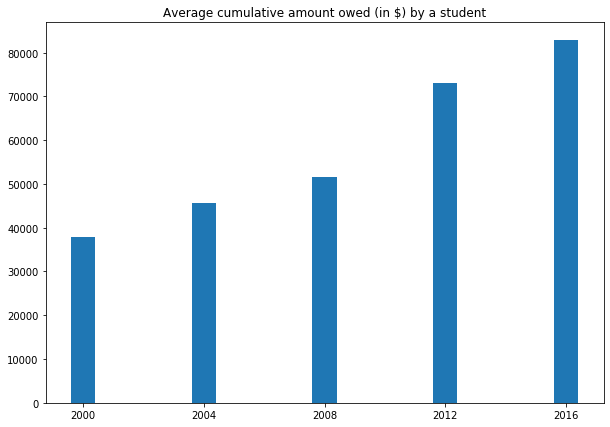

In [142]:
x = data['Year'].values
y = data['Percent of graduate degree completers with student loan debt'].values
y1 = data['Average cumulative amount owed'].values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Percent of graduate degree completers with student loan debt", "Student loan trend for graduate studies")

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
# print(x,y1, len(x), len(y1))
plt.bar(x, y1)
plt.title("Average cumulative amount owed (in $) by a student")
plt.xticks(x)
print()

In [189]:
data = pd.read_csv('data/non_mortage_loans.csv')
data

,Quarter,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,05:Q2,05:Q3,05:Q4,06:Q1,...,12:Q3,12:Q4,13:Q1,13:Q2,13:Q3,13:Q4,14:Q1,14:Q2,14:Q3,14:Q4
0,HELOC,328,367,426,468,502,528,541,565,582,...,573,563,552,540,535,529,526,521,512,510
1,Auto Loan,720,743,751,728,725,774,830,792,788,...,768,783,794,814,845,863,875,905,934,955
2,Credit Card,695,697,706,717,710,717,732,736,723,...,674,679,660,668,672,683,659,669,680,700
3,Student Loan,260,263,330,346,364,374,378,392,435,...,956,967,986,994,1027,1080,1111,1118,1126,1157
4,Other,447,423,410,423,394,402,405,416,418,...,311,317,307,296,304,317,314,323,327,335


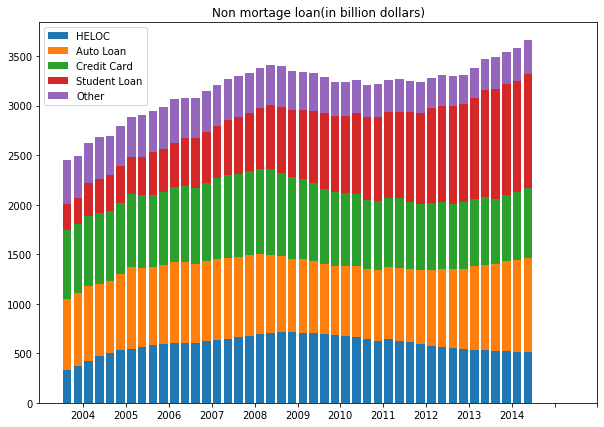

In [190]:
x = data.columns.values[1:]
y1 = data[data['Quarter']=='HELOC'].values[0][1:]
y2 = data[data['Quarter']=='Auto Loan'].values[0][1:]
y3 = data[data['Quarter']=='Credit Card'].values[0][1:]
y4 = data[data['Quarter']=='Student Loan'].values[0][1:]
y5 = data[data['Quarter']=='Other'].values[0][1:]

labels = np.array(range(2004, 2015, 1))
# print(labels)
fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
# print(x,y1, len(x), len(y1))
p1 = plt.bar(x, y1)
p2 = plt.bar(x, y2, bottom=y1)
p3 = plt.bar(x, y3, bottom=y2+y1)
p4 = plt.bar(x, y4, bottom=y3+y1+y2)
p5 = plt.bar(x, y5, bottom=y4+y3+y1+y2)
plt.title("Non mortage loans amount over a period 2004-2014(in billion dollars)")

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('HELOC', 'Auto Loan', 'Credit Card', 'Student Loan', 'Other'))
# plt.xticks(np.arange(0, len(x), step=4))
plt.xticks(np.array(range(0,13*4,4))+1.5, set(labels))
print()


In [214]:
data = pd.read_csv('data/student_loan_by_age.csv')
data['Total'] = data['under 30'] + data['30-39']+data['40-49']+data['50-59']+data['60+']+data['unknown']
data


,Year,under 30,30-39,40-49,50-59,60+,unknown,Total
0,2004,146.0,114.0,49.2,30.9,6.1,0.90,347.10
1,2005,161.0,129.0,55.6,38.3,8.2,0.70,392.80
2,2006,194.0,154.0,69.4,47.9,13.2,0.30,478.80
3,2007,217.0,171.0,81.7,55.4,15.8,0.40,541.30
4,2008,248.0,202.0,95.7,67.1,20.0,0.50,633.30
5,2009,273.0,229.0,109.0,77.7,25.0,0.70,714.40
6,2010,299.0,257.0,127.0,90.5,29.1,0.90,803.50
7,2011,312.0,281.0,140.0,97.2,35.2,0.90,866.30
8,2012,320.0,320.0,163.0,113.0,42.6,1.30,959.90
9,2013,356.0,354.0,184.0,126.0,49.4,1.60,1071.00


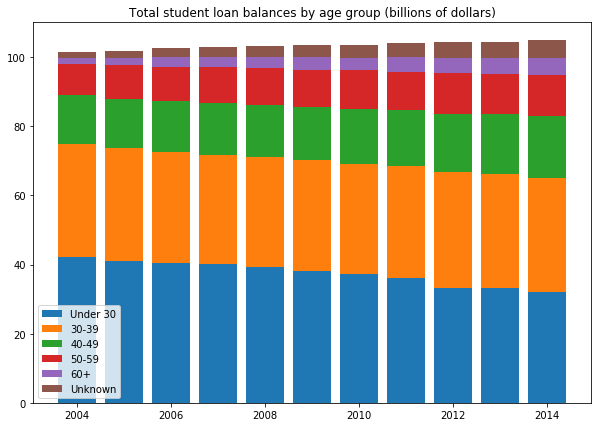

In [213]:

x = data['Year']
y1 = data['under 30']/data['Total']*100
y2 = data['30-39']/data['Total']*100
y3 = data['40-49']/data['Total']*100
y4 = data['50-59']/data['Total']*100
y5 = data['60+']/data['Total']*100
y6 = data['unknown']/data['Total']*100
# print(x)
# y = np.array([data[data['Year']==i].values[0][1:] for i in range(2004,2015,1)])
fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
p1 = plt.bar(x, y1)
p2 = plt.bar(x, y2, bottom=y1)
p3 = plt.bar(x, y3, bottom=y2+y1)
p4 = plt.bar(x, y4, bottom=y3+y1+y2)
p5 = plt.bar(x, y5, bottom=y4+y3+y1+y2)
p6 = plt.bar(x, y5, bottom=y5+y4+y3+y1+y2)

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Under 30', '30-39', '40-49', '50-59', '60+', 'Unknown'))
plt.title("Total student loan balances by age group (billions of dollars)")

print("")


In [222]:
data = pd.read_csv('data/student_loan_by_amount.csv')
data

,Balance in 2014,Number of Borrowers
0,<$5k,9028800
1,$5k-$10k,7785500
2,$10k-$25k,12348000
3,$25k-$50k,7997000
4,$50k-$75k,3126800
5,$75k-$100k,1238100
6,$100k-$150k,1026100
7,$150k-$200k,444200
8,>$200k,348600


Text(0.5, 1.0, "Distribution of total students loan in 2014 by it's amount")

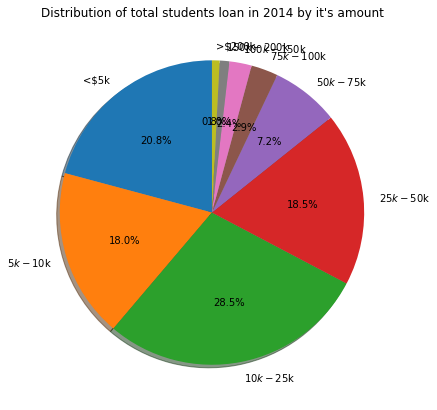

In [223]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
x = data['Number of Borrowers'].div(data['Number of Borrowers'].sum()*0.01)
labels = data['Balance in 2014']
plt.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Distribution of total students loan in 2014 by it's amount")


## 4. SCNEARIO TODAY
(2018-2019 year)

Let's address following questions with data

1. Overall students enrolled into different graduate courses over a year 2019
2. Graduate courses tution fees in top colleges, top courses 
3. Number of students and amount of loans taken by students to sponsor their graduate studies and Students who are currently paying off their debt of student loans
4. How much student loans contribute to the economy overall
5. What experts say about the student loans and debts in coming future years


### 4.1 Overall students enrolled into different graduate courses over a year 2019

**Data**:
1. College Graduation Statistics by EducationData [link](https://educationdata.org/number-of-college-graduates/)

**Visualization Takeaway**:
1. 35% of the US population had completed 4 years of college or more. Comparatively, in 1940, this number was only 4.6% of the population
2. 3700000 students graduated in 2019


In [133]:
data = pd.read_csv('data/2019_Graduates.csv')
data

,Year,Enrollment,Type
0,2019,989000,Associate Degree
1,2019,820000,Master's Degree
2,2019,184000,Doctorate Degree
3,2019,1900000,Bachelor's Degree
4,2019,3700000,Total
5,2019,3300000,Public Schools
6,2019,300000,Private Schools
7,2000,68685,Total
8,2000,15312,Post secondary


Total 1004000 (27.14%) students graduated from post-graduation courses in 2019.
5364.618184465313% higher than 2000 year's total graduation number.


Text(0.5, 1.0, 'Distribution of total students graduated in year 2019 ~ 3.9 million')

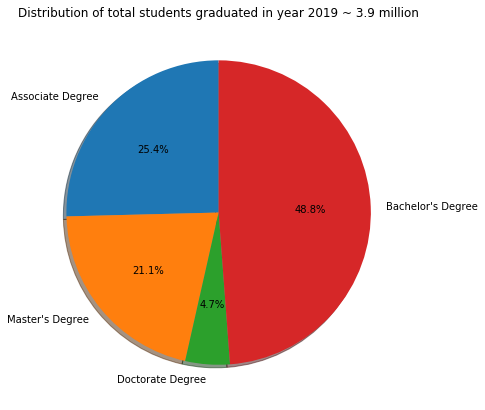

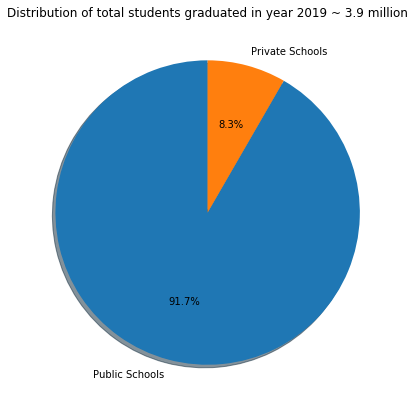

In [135]:
x = data['Enrollment'].div(data['Enrollment'][4]*0.01)[:4]
labels = data['Type'][:4]
# print(x, labels)
# print(len(x), len(labels))
# explode = (0, 0.1, 0.1, 0)
fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plt.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Distribution of total students graduated in year 2019 ~ 3.9 million")
print("Total {} ({:.2f}%) students graduated from post-graduation courses in 2019.".format(
    data['Enrollment'][1]+ data['Enrollment'][2],
    float(data['Enrollment'][1]+ data['Enrollment'][2])/data['Enrollment'][4]*100))
print("{}% higher than 2000 year's total graduation number.".format((data['Enrollment'][4]-data['Enrollment'][8])/data['Enrollment'][7]*100))

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
x = data['Enrollment'].div(data['Enrollment'][4]*0.01)[5:7]
labels = data['Type'][5:7]
plt.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Distribution of total students graduated in year 2019 ~ 3.9 million")


### 4.2. Graduate courses tution fees in top colleges, top courses 

**Data**
1. Average undergraduate tuition and fees and room and board rates charged for full-time students in degree-granting postsecondary institutions, by level and control of institution: Selected years, 1963-64 through 2017-18 [link](https://nces.ed.gov/programs/digest/d18/tables/dt18_330.10.asp)


**Visualization Takeaway**
1. The average expenses of a year for an undergraduate student is $23835, which is 120% higher than year 2000.
2. The average expenses of a year for an undergraduate course is almost 3 times in Private Institutions than Public Institutions.


In [131]:
data = pd.read_csv('data/2018_fees.csv')
data

,Year,Enrollment,Type
0,2018,42681,Private Institutions
1,2018,17797,Public Institutions
2,2018,23835,Total
3,2000,7586,Public Institutions
4,2000,21373,Private Institutions
5,2000,10820,Total


### 4.3 Number of students and amount of loans taken by students to sponsor their graduate studies

**Data**
1. QUARTERLY REPORT ON HOUSEHOLD DEBT AND CREDIT [link](https://www.newyorkfed.org/medialibrary/interactives/householdcredit/data/pdf/hhdc_2019q3.pdf)

**Visualization Takeaway**
1. $1.64 trillion Total Student debt till 2019 in U.S.
2. 44.7 million Americans with student loan debt, total 69% of 2019 graduate students




## Machine Learning Model
## Predicting the trends of post-secondary education in coming years at UIC

**Enrollment prediction**
1. field of study overall enrollment & women enrollment
2. tution fee trend 

NOTE: We could predict the value for all above columns for incoming years 2020-2030. For example expected number of
women enrollment in year 2030 at UIC predicted by the model, expected number of biology graduates, business majors etc.
However, we have very less data to train the model, 1997-2019, results into not very accurate predictions.
Below we have trained model and predicted some of the values mentioned by the model trained on data of 1997-2019. 
The SVM model accuracy is >99% in all cases on values for year 2016-2018


In [42]:

UIC_UNITID = 145600
uic = pd.DataFrame()
for i in range(1996, 2019):
    df = pd.read_csv('../CollegeScorecard_Raw_Data/MERGED{:04d}_{}_PP.csv'.format(i, str(i+1)[2:]), low_memory=False)
    uic = uic.append(df[df['UNITID'] == UIC_UNITID])

uic

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN
1404,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18249.0,11609.0,NaN
1327,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18184.0,10488.0,NaN
1284,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18731.0,10107.0,NaN
1267,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18406.0,10292.0,NaN
1246,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18342.0,10491.0,NaN
1240,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18278.0,10524.0,NaN
1223,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18010.0,10989.0,NaN
1209,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18826.0,11587.0,NaN
1178,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18512.0,11590.0,NaN
1169,145600,00177600,1776,University of Illinois at Chicago,Chicago,IL,60607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17113.0,10891.0,NaN


In [51]:
# Clean data to only values we want

uic = uic[['UGDS', 'UGDS_WOMEN','TUITIONFEE_IN','TUITIONFEE_OUT','AVGFACSAL',
            'PCIP14', 'PCIP11', 'PCIP13', 'PCIP04', 'PCIP23', 'PCIP16', 'PCIP26', 'PCIP27',
            'PCIP38', 'PCIP42', 'PCIP52', 'PCIP54']].fillna(0)
uic['year'] = [i for i in range(1996, 2019)]
uic
# uic['UGDS'], uic['UGDS_WOMEN'], 
# uic['TUITIONFEE_IN'], uic['TUITIONFEE_OUT'], 
# uic['AVGFACSAL']
# uic['CIPCODE1']
# uic['PCIP14'], uic['PCIP11'], # engineering, computer science 
# uic['PCIP13'], uic['PCIP04'] # education, Architecture
# uic['PCIP23'], uic['PCIP16']  # english, foreign language
# uic['PCIP26'], uic['PCIP27'] # biology, math
# uic['PCIP38'], uic['PCIP42']   # philosophy, psychology
# uic['PCIP52'], uic['PCIP54'] # business major, history
# uic.index


,UGDS,UGDS_WOMEN,TUITIONFEE_IN,TUITIONFEE_OUT,AVGFACSAL,PCIP14,PCIP11,PCIP13,PCIP04,PCIP23,PCIP16,PCIP26,PCIP27,PCIP38,PCIP42,PCIP52,PCIP54,year
1404,16114.0,0.5357,0.0,0.0,6556.0,0.1241,0.0036,0.0457,0.0269,0.0504,0.0160,0.0679,0.0083,0.0018,0.0773,0.1753,0.0160,1996
1327,16192.0,0.5382,0.0,0.0,6955.0,0.1047,0.0076,0.0426,0.0430,0.0628,0.0094,0.0690,0.0040,0.0054,0.1051,0.1817,0.0159,1997
1284,16286.0,0.5450,0.0,0.0,7293.0,0.1191,0.0125,0.0638,0.0213,0.0476,0.0192,0.0850,0.0034,0.0034,0.1049,0.1505,0.0182,1998
1267,16104.0,0.5438,0.0,0.0,7490.0,0.1102,0.0116,0.0523,0.0232,0.0586,0.0168,0.0772,0.0067,0.0046,0.1158,0.1916,0.0133,1999
1246,0.0,0.0000,4800.0,11264.0,0.0,0.0987,0.0150,0.0584,0.0184,0.0516,0.0208,0.0922,0.0038,0.0048,0.1048,0.2090,0.0161,2000
1240,15773.0,0.5497,5620.0,12280.0,7692.0,0.1074,0.0189,0.0517,0.0233,0.0595,0.0180,0.0797,0.0066,0.0047,0.1109,0.2108,0.0186,2001
1223,16473.0,0.5490,6592.0,13920.0,7371.0,0.1072,0.0195,0.0446,0.0217,0.0739,0.0129,0.0823,0.0060,0.0063,0.0924,0.2112,0.0189,2002
1209,15943.0,0.5470,6958.0,16654.0,7764.0,0.0975,0.0644,0.0457,0.0267,0.0432,0.0089,0.0831,0.0064,0.0046,0.0908,0.1736,0.0138,2003
1178,15402.0,0.5417,7824.0,19072.0,7847.0,0.0993,0.0469,0.0487,0.0282,0.0392,0.0135,0.0987,0.0083,0.0055,0.0914,0.1769,0.0166,2004
1169,15029.0,0.5338,8498.0,20888.0,8142.0,0.0984,0.0324,0.0603,0.0171,0.0314,0.0137,0.1061,0.0092,0.0048,0.0943,0.1972,0.0194,2005


In [220]:
## Building a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def predict_using_sklearn(uic, column_name):
    uit = uic[uic[column_name]!=0]
#     x_all = np.array([[i/2000] for i in uit['year']])
#     y_all = np.array([[i] for i in uit[column_name]])
    x_all = np.array([[i] for i in uit[column_name]])[:-1]
    y_all = np.array([[i] for i in uit[column_name]])[1:]
    x_train, x_test = x_all[:20], x_all[20:]
    y_train, y_test = y_all[:20], y_all[20:]

    
    regression_model = LinearRegression()
    regression_model.fit(x_train, y_train)
    y_prediction = regression_model.predict(x_test)
    # print(x_test, y_test, y_prediction)
    mse = mean_squared_error(y_test, y_prediction)
    print("Model MSE error: {}".format(mse))
#     return mse, regression_model.predict([[i/2000] for i in range(2019, 2031)])
    return mse, regression_model.predict([[i] for i in range(2019, 2031)])


In [221]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(12, activation='relu', input_shape=[1]),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model


def predict_using_tensorflow(uic, column_name):
    model = build_model()
    EPOCHS = 100

    uit = uic[uic[column_name]!=0]
    x_all = np.array([[i] for i in uit[column_name]])[:-1]
    y_all = np.array([[i] for i in uit[column_name]])[1:]
#     x_all = np.array([[i/2000] for i in uit['year']])
#     y_all = np.array([[i] for i in uit[column_name]])
    x_train, x_test = x_all[:20], x_all[20:]
    y_train, y_test = y_all[:20], y_all[20:]
    history = model.fit(
      x_train, y_train,
      epochs=EPOCHS, validation_split = 0.2, verbose=0)

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()
    loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

    print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
    # model.predict(x_test).flatten()
#     return model.predict([[i/2000] for i in range(2019, 2031)]).flatten()
    return model.predict([[i] for i in range(2019, 2031)]).flatten()

In [185]:
column_name = 'UGDS_WOMEN'
y1 = predict_using_sklearn(uic, column_name)[1]
y2 = predict_using_tensorflow(uic, column_name)

Model MSE error: 0.00013839503452725525
1/1 - 0s - loss: 7.1866e-04 - mae: 0.0265 - mse: 7.1866e-04
Testing set Mean Abs Error:  0.03 MPG


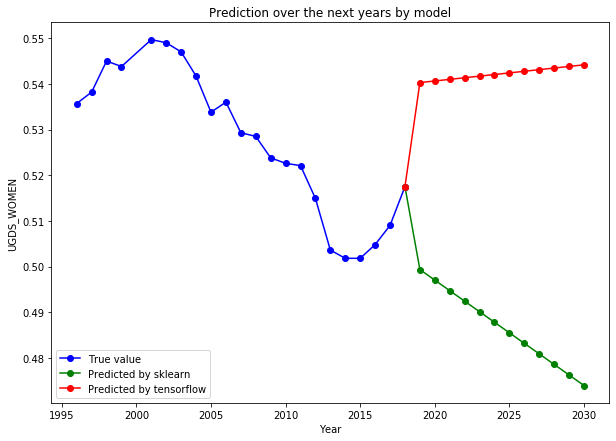

In [222]:
def plot_predicted_value_graph(column_name):
    x = list(uic[uic[column_name]!=0]['year'])
    yo = list(uic[uic[column_name]!=0][column_name])
    fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
    plot_graph(x, yo, '-ob', "Year", column_name, "Prediction over the next years by model", label='True value')
    
    x = [i for i in range(2018, 2031)]
    y  = [i[0] for i in y1]
    y.insert(0, yo[-1])
    plot_graph(x, y, '-og', "Year", column_name, "Prediction over the next years by model", label='Predicted by sklearn')

    y = list(y2)
    y.insert(0, yo[-1])
    plot_graph(x, y, '-or', "Year", column_name, "Prediction over the next years by model", label='Predicted by tensorflow')
    plt.legend()

# # print(y1, y2)
# # print(list(**y1))
# # print([i[0] for i in y1])
# x = list(uic[uic[column_name]!=0]['year'])
# yo = list(uic[uic[column_name]!=0][column_name])
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
# plot_graph(x, yo, '-ob', "Year", column_name, "Prediction over the next years by model", label='True value')
# # print(x, y)
# x = [i for i in range(2018, 2031)]
# y  = [i[0] for i in y1]
# y.insert(0, yo[-1])
# # print(y)
# plot_graph(x, y, '-og', "Year", column_name, "Prediction over the next years by model", label='Predicted by sklearn')
# # type(y2)
# y = list(y2)
# y.insert(0, yo[-1])
# # print(y)
# plot_graph(x, y, '-or', "Year", column_name, "Prediction over the next years by model", label='Predicted by tensorflow')
# plt.legend()
# # plt.title("")
# # plt.xticks(x)
# # print()
plot_predicted_value_graph(column_name)

In [223]:
column_names = ['UGDS', 'UGDS_WOMEN','AVGFACSAL',
            'PCIP14', 'PCIP11', 'PCIP13', 'PCIP04', 'PCIP23', 'PCIP16', 'PCIP26', 'PCIP27',
            'PCIP38', 'PCIP42', 'PCIP52', 'PCIP54']

predictions = dict()

for cm in column_names:
    predictions[cm] = dict()
    model_result = predict_using_sklearn(uic, cm)
    predictions[cm]['values'] = model_result[1]
    predictions[cm]['mse'] = model_result[0]

predictions

Model MSE error: 420073.71787880413
Model MSE error: 9.175682403758908e-05
Model MSE error: 76588.3061016497
Model MSE error: 0.00016761687168825293
Model MSE error: 0.00031575316869732
Model MSE error: 6.080874802081202e-05
Model MSE error: 2.6569321604727196e-05
Model MSE error: 3.210191672678562e-05
Model MSE error: 1.1089551631606958e-05
Model MSE error: 1.2685033393166663e-05
Model MSE error: 6.192036382029495e-07
Model MSE error: 8.155836528203948e-06
Model MSE error: 5.28604495271643e-05
Model MSE error: 7.654586441416464e-05
Model MSE error: 3.262335002413948e-05


{'UGDS': {'values': array([[-417.18426588],
         [-416.00184337],
         [-414.81942087],
         [-413.63699837],
         [-412.45457586],
         [-411.27215336],
         [-410.08973085],
         [-408.90730835],
         [-407.72488585],
         [-406.54246334],
         [-405.36004084],
         [-404.17761833]]), 'mse': 420073.71787880413},
 'UGDS_WOMEN': {'values': array([[1992.70649531],
         [1993.69346953],
         [1994.68044375],
         [1995.66741796],
         [1996.65439218],
         [1997.6413664 ],
         [1998.62834062],
         [1999.61531483],
         [2000.60228905],
         [2001.58926327],
         [2002.57623748],
         [2003.5632117 ]]), 'mse': 9.175682403758908e-05},
 'AVGFACSAL': {'values': array([[2199.70951567],
         [2200.71716323],
         [2201.7248108 ],
         [2202.73245836],
         [2203.74010593],
         [2204.7477535 ],
         [2205.75540106],
         [2206.76304863],
         [2207.77069619],
         [2208

In [225]:
column_explanation = {
    'UGDS': 'Enrollment of undergraduate students',
    'UGDS_WOMEN': 'Total share of enrollment of undergraduate',
    'AVGFACSAL': 'Average faculty salary($)',
    'PCIP14': 'Engineering',
    'PCIP11': 'Computer And Information Sciences And Support Services', 
    'PCIP13': 'Education', 
    'PCIP04': 'Architecture And Related Services', 
    'PCIP23': 'English Language And Literature/Letters', 
    'PCIP16': 'Foreign Languages, Literatures, And Linguistics', 
    'PCIP26': 'Biological And Biomedical Sciences', 
    'PCIP27': 'Mathematics And Statistics',
    'PCIP38': 'Philosophy And Religious Studies', 
    'PCIP42': 'Psychology', 
    'PCIP52': 'Business, Management, Marketing', 
    'PCIP54': 'History'
}

print("The values predicted by the model for year 2030 at UIC is:")
for i in predictions.keys():
    print("{cm} ({cm_explanation}): {val} with {acc} model accuracy".format(cm=i,
        cm_explanation=column_explanation[i], val=predictions[i]['values'][-1],
        acc=1.0-predictions[i]['mse']))
#     plot_predicted_value_graph(i)


The values predicted by the model for year 2030 at UIC is:
UGDS (Enrollment of undergraduate students): [-404.17761833] with -420072.71787880413 model accuracy
UGDS_WOMEN (Total share of enrollment of undergraduate): [2003.5632117] with 0.9999082431759624 model accuracy
AVGFACSAL (Average faculty salary($)): [2210.79363889] with -76587.3061016497 model accuracy
PCIP14 (Engineering): [1212.03003521] with 0.9998323831283118 model accuracy
PCIP11 (Computer And Information Sciences And Support Services): [1218.68652349] with 0.9996842468313026 model accuracy
PCIP13 (Education): [1504.15389805] with 0.9999391912519792 model accuracy
PCIP04 (Architecture And Related Services): [867.41404373] with 0.9999734306783953 model accuracy
PCIP23 (English Language And Literature/Letters): [1454.52807366] with 0.9999678980832732 model accuracy
PCIP16 (Foreign Languages, Literatures, And Linguistics): [702.81921881] with 0.9999889104483684 model accuracy
PCIP26 (Biological And Biomedical Sciences): [186

As we can see in results, the model predicted the Biology and Biomedical Sciences field as the largest number of graduates in 2030 at UIC. 